<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/02-Linear-Difference-Equations-Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Class Version In Colab"/>Class Version</a>

<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/02-Linear-Difference-Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Difference Equations

## The Homogeneous Equation

$$
\begin{align*}
x_{t} & = (1 + 0.02) x_{t - 1} \\
x_t & = (1.02)^t x_0
\end{align*}
$$

Or more generally:

$$
\begin{align*}
x_{t} & = \phi x_{t - 1} \\
x_t & = \phi^{t} x_{0}
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sequence of time periods from 0 to 49

# Set the value of phi to something between -2 and 2 (your choice)

# Compute x_t for each time period using the formula x_t = phi^t * x_0, where x_0 = 1

# Plot the results using matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(20)
x_0 = 10
phi = [0.8, 0.9, 0.95, 1.0, 1.005, 1.01, 1.02]

x = np.zeros((len(phi), len(t)))

for i in range(len(phi)):
    x[i, :] = x_0 * phi[i]**t

x

array([[10.        ,  8.        ,  6.4       ,  5.12      ,  4.096     ,
         3.2768    ,  2.62144   ,  2.097152  ,  1.6777216 ,  1.34217728,
         1.07374182,  0.85899346,  0.68719477,  0.54975581,  0.43980465,
         0.35184372,  0.28147498,  0.22517998,  0.18014399,  0.14411519],
       [10.        ,  9.        ,  8.1       ,  7.29      ,  6.561     ,
         5.9049    ,  5.31441   ,  4.782969  ,  4.3046721 ,  3.87420489,
         3.4867844 ,  3.13810596,  2.82429536,  2.54186583,  2.28767925,
         2.05891132,  1.85302019,  1.66771817,  1.50094635,  1.35085172],
       [10.        ,  9.5       ,  9.025     ,  8.57375   ,  8.1450625 ,
         7.73780937,  7.35091891,  6.98337296,  6.63420431,  6.3024941 ,
         5.98736939,  5.68800092,  5.40360088,  5.13342083,  4.87674979,
         4.6329123 ,  4.40126669,  4.18120335,  3.97214318,  3.77353603],
       [10.        , 10.        , 10.        , 10.        , 10.        ,
        10.        , 10.        , 10.        , 1

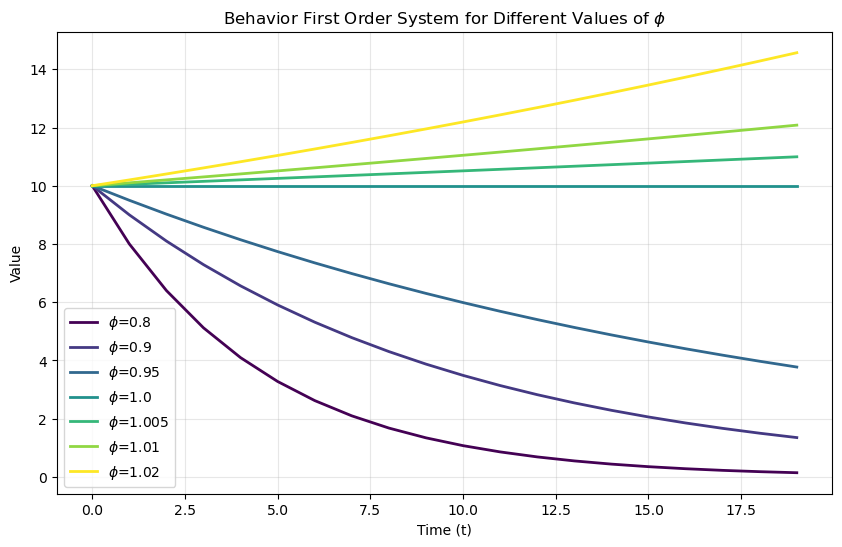

In [3]:
#| label: fig-diff-eq-homogeneous-behavior
#| fig-cap: "Behavior of the homogeneous system for different values of $\\phi$"

# Plot the results with continuous color scale

plt.figure(figsize=(10, 6))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(phi)))

for i in range(len(phi)):
    plt.plot(t, x[i], label=fr"$\phi$={phi[i]}", color=colors[i], linewidth=2)

plt.title(r"Behavior First Order System for Different Values of $\phi$")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [4]:
phi_neg = [-0.95, -1.0, -1.01]

t_neg = np.arange(30)
x_neg = np.zeros((len(phi_neg), len(t_neg)))

for i in range(len(phi_neg)):
    x_neg[i, :] = x_0 * phi_neg[i]**t_neg

x_neg

array([[ 10.        ,  -9.5       ,   9.025     ,  -8.57375   ,
          8.1450625 ,  -7.73780937,   7.35091891,  -6.98337296,
          6.63420431,  -6.3024941 ,   5.98736939,  -5.68800092,
          5.40360088,  -5.13342083,   4.87674979,  -4.6329123 ,
          4.40126669,  -4.18120335,   3.97214318,  -3.77353603,
          3.58485922,  -3.40561626,   3.23533545,  -3.07356868,
          2.91989024,  -2.77389573,   2.63520094,  -2.5034409 ,
          2.37826885,  -2.25935541],
       [ 10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ],
       [ 10.        , -10.1   

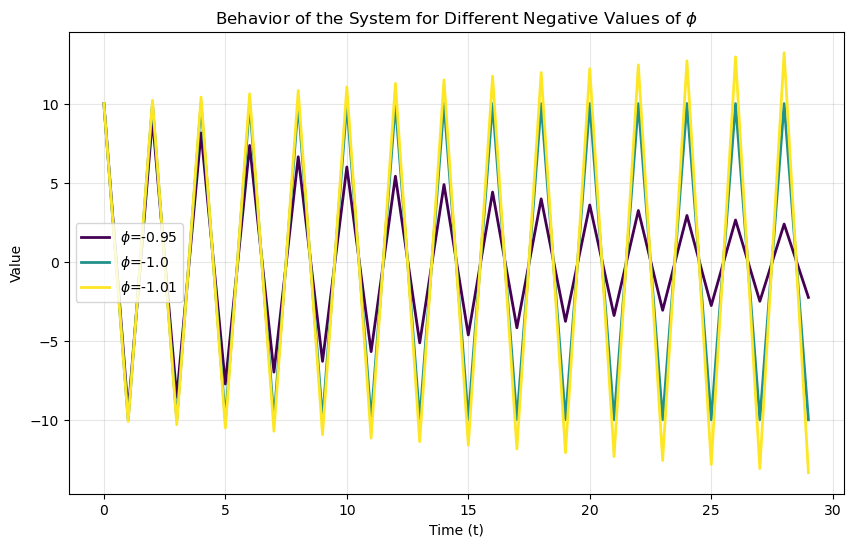

In [5]:
#| label: fig-diff-eq-homogeneous-behavior-negative
#| fig-cap: "Behavior of the homogeneous system for different negative values of $\\phi$"

# Plot the results with continuous color scale

plt.figure(figsize=(10, 6))
# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(phi_neg)))
for i in range(len(phi_neg)):
    plt.plot(t_neg, x_neg[i], label=fr"$\phi$={phi_neg[i]}", color=colors[i], linewidth=2)

plt.title(r"Behavior of the System for Different Negative Values of $\phi$")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)

From @fig-diff-eq-homogeneous-behavior-negative you can see that $\phi = -1$ is also a quite special boundary case.
Because taking an even power (e.g. $(-1)^2 = 1$) of a negative number gives a positive result and taking an odd power (e.g. $(-1)^3 = (-1)\times (-1) \times (-1) = -1 $) of a negative number gives a negative result,
the value of your bank account will flip from $x_0$ in even months to $-x_0$ in odd months.

Again, for values of $\phi$ that are slightly smaller than -1 (for example $\phi = -1.01$) the value of your bank account will oscillate between positive and negative values and diverge (it will go to plus or minus infinity as $t$ goes to infinity).

Only for $0 < \phi < -1$ does the value go to zero as $t$ goes to infinity (again, in an oscillating manner).

$$
\lim_{t \to \infty} x_t = \lim_{t \to \infty} \phi^t x_0 = 0 \quad \text{for any } -1 < \phi < 0
$$


## The Non-Homogeneous Equation


$$
x_{t} = (1 + 0.02) x_{t - 1} + e_t
$$

$$
x_{t} = \phi x_{t - 1} + e_t
$$

$$
\begin{align}
t & \quad y_t \\
1 & \quad y_1 = \phi y_{0} + e_{1} \\
2 & \quad y_2 = \phi y_{1} + e_{2} \\
3 & \quad y_3 = \phi y_{2} + e_{3} \\
& \vdots \\
t & \quad y_{t} = \phi y_{t - 1} + e_{t} \\
t + 1 &  \quad y_{t + 1} = \phi y_{t} + e_{t + 1}\\
t + 2 & \quad y_{t + 2} = \phi y_{t + 1} + e_{t + 2}
\end{align}
$$

$$
y_{t + j} = \phi^{j + 1} y_{t - 1} + \phi^{j}e_{t} + \phi^{j - 1} e_{t + 1} + \ldots \phi^1 e_{t + j - 1} + \phi^0 e_{t + j}
$$
We can write this more compactly as:

$$
y_{t + j} = \phi^{j + 1} y_{t - 1} + \sum_{k = 0}^{j} \phi^{k} e_{t + j - k}
$$


In [ ]:
np.random.seed(41232)

t = np.arange(100)
x_0 = 10

phi = 0.5

e = np.random.uniform(-5, 5, size=len(t))

x = np.zeros((2, len(t)))

for i in range(len(t)):
    if i == 0:
        x[0, i] = x_0 + e[i]
        x[1, i] = x_0 + e[i] + 10
    else:
        x[0, i] = phi * x[0, i - 1] + e[i]
        x[1, i] = phi * x[1, i - 1] + e[i]

x

array([[ 1.36325418e+01,  5.25923045e+00,  5.63660368e+00,
         7.50304807e-01,  2.10698614e+00,  5.98083035e+00,
        -5.31245620e-01, -1.42435677e+00, -3.21723037e+00,
         1.57197646e+00,  8.23479999e-01, -2.47959768e+00,
         3.25796902e+00,  6.38937275e+00,  4.87199650e+00,
         4.35537791e-01,  3.77906909e+00,  2.83068716e-01,
        -2.66969516e-01,  4.14984601e+00,  1.71680872e+00,
         2.55901216e+00,  1.60141609e+00,  5.24205660e+00,
         6.57745184e+00,  7.83870833e-01, -5.12622177e-01,
         7.23195417e-01, -3.28262593e-01, -3.17374273e+00,
        -4.22982237e+00,  1.83182897e+00, -3.02980132e+00,
        -2.56872119e+00,  3.40411062e+00,  3.46438800e+00,
        -1.61075547e+00, -1.18696277e+00,  1.12644717e+00,
         8.82118223e-01, -5.99537024e-01,  3.08356991e+00,
        -2.48825924e+00, -1.25994964e+00,  2.50015526e+00,
         4.08294961e+00,  6.53456297e+00,  4.43640354e+00,
        -5.77657148e-01,  2.41399433e+00,  9.39633012e-0

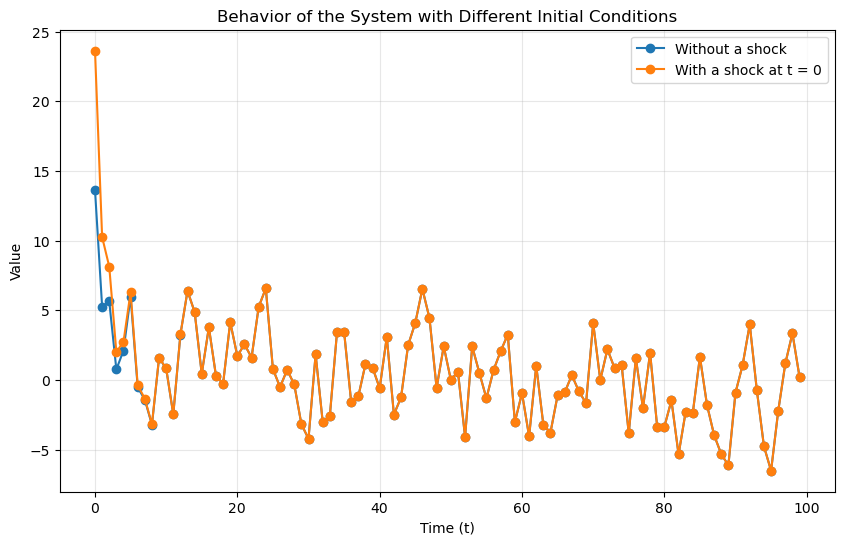

In [7]:
# Plot the two rows of x

plt.figure(figsize=(10, 6))
plt.plot(t, x[0], label="Without a shock", marker="o")
plt.plot(t, x[1], label="With a shock at t = 0", marker="o")
plt.title(r"Behavior of the System with Different Initial Conditions")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)

In [8]:
# Look at the difference between the two series


## The Geometric Series

$$
S_n = 1 + \phi + \phi^2 + \phi^3 + \ldots + \phi^n
$$

How does it behave for different values of $\phi$ and large $n$?


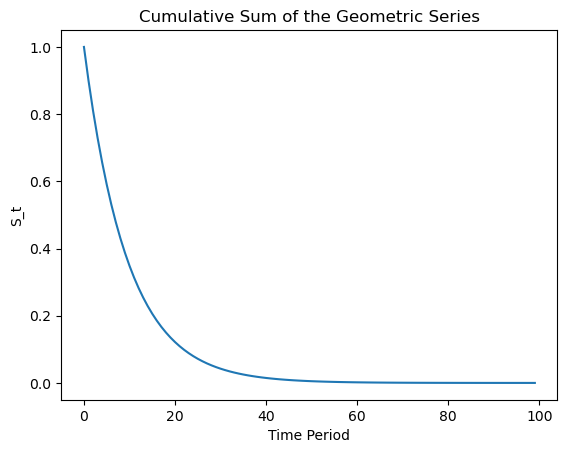

In [16]:
# Let us check it with code
# Create a sequence of time periods from zero to 100
# Set phi to 0.9

phi = 0.9
t = np.arange(100)

# Compute S_t = sum_{i=0}^{t} phi^i (using the np.cumsum function)
x_t = phi ** t

# Plot the series
import matplotlib.pyplot as plt

plt.plot(t, x_t)
plt.title("Cumulative Sum of the Geometric Series")
plt.xlabel("Time Period")
plt.ylabel("S_t")
plt.show()

## Second Order Linear Difference Equations

$$
x_t = \phi_1 x_{t - 1} + \phi_2 x_{t - 2}
$$


$$
\begin{align*}
x_t & = \phi_1 x_{t - 1} + \phi_2 x_{t - 2}\\
x_{t - 1} & = x_{t - 1}\\
\end{align*}
$$


$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}

\phi_1 & \phi_2 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

It turns out that this system is stable if the solutions to the characteristic equation

$$
\det\begin{pmatrix}
\phi_1 - \lambda & \phi_2 \\
1 & - \lambda
\end{pmatrix} = 0
$$

are all smaller than 1 in absolute value.

Write down the characteristic equation in terms of $\lambda$, $\phi_1$ and $\phi_2$

Then solve the equation for $\phi_1 = 0.5$ and $\phi_2 = 0.4$

In [10]:
# For phi_1 = 0.5 and 0.1, check if the characteristic equation
# has roots inside the unit circle

# np.roots([])

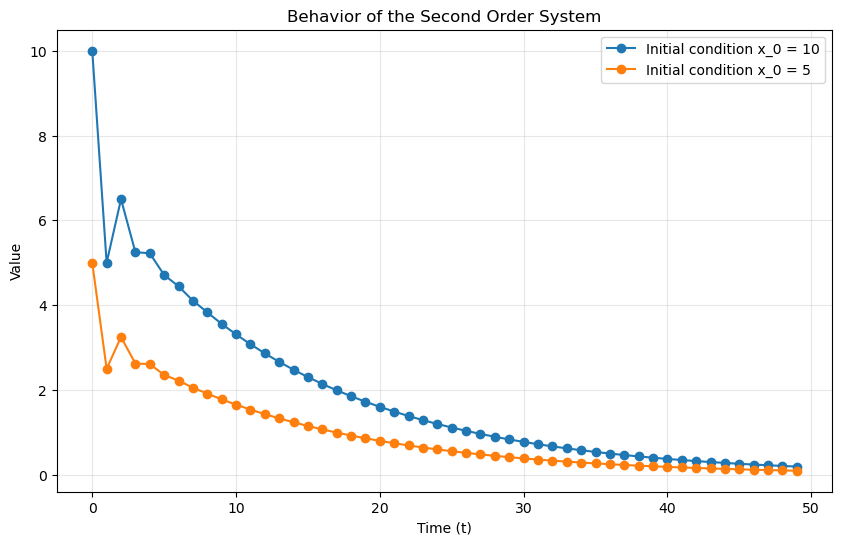

In [11]:
# Simulate the second order difference equation with phi_1 = 0.5 and phi_2 = 0.4

t = np.arange(50)
x_0 = [10, 5]
phi_1 = 0.5
phi_2 = 0.4

x = np.zeros((2, len(t)))
for i in range(len(t)):
    if i == 0:
        x[0, i] = x_0[0]
        x[1, i] = x_0[1]
    elif i == 1:
        x[0, i] = phi_1 * x[0, i - 1]
        x[1, i] = phi_1 * x[1, i - 1]
    else:
        x[0, i] = phi_1 * x[0, i - 1] + phi_2 * x[0, i - 2]
        x[1, i] = phi_1 * x[1, i - 1] + phi_2 * x[1, i - 2]

# Plot the results

plt.figure(figsize=(10, 6))
plt.plot(t, x[0], label="Initial condition x_0 = 10", marker="o")
plt.plot(t, x[1], label="Initial condition x_0 = 5", marker="o")
plt.title(r"Behavior of the Second Order System")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)


With $\phi_1 = 0.5$ and $\phi_2 = 0.1$ the system of equations is:

$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
0.5 & 0.4 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

Next, I claim that the matrix 

$$
\begin{pmatrix}
0.5 & 0.4 \\
1 & 0
\end{pmatrix}
$$

can be decomposed as follows:

$$
\begin{pmatrix}
0.5 & 0.4 \\
1 & 0
\end{pmatrix} = 

\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92 
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
$$

Ok, it is absolutely not obvious that this is true. But you can check it by
simply doing the matrix multiplications on the right hand side.
You will get the matrix on the left hand side (up to rounding errors, because I rounded the numbers in the matrices to save space).


There fore the system of equations can be written as:

$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

Now we can pre-multiply both sides of the equation by the third matrix 

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
$$

to get:

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
=
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$



It may be not clear why why we are doing this but the magic thing is that the product
of the first two matrices on the right hand side is the identity matrix (up to rounding errors here):

$$
\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
=
\begin{pmatrix}1 & 0 \\
0 & 1
\end{pmatrix}
$$

The equation therefore simplifies to:

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

And we can skip the identity matrix as it does not change anything:

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
=
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

Let us now write the matrix multiplying the x vector on the left hand side as a new vector:

$$
\begin{pmatrix}
\tilde{x}_t \\
\tilde{x}_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

The right hand side of the equation becomes:

$$
\begin{pmatrix}
\tilde{x}_t \\
\tilde{x}_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
x_t + 0.43 x_{t - 1} \\
-0.80 x_{t - 1} + 0.74 x_{t - 2}
\end{pmatrix}
$$

The whole equation now becomes:

$$
\begin{pmatrix}
\tilde{x}_t \\
\tilde{x}_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
\tilde{x}_{t - 1} \\
\tilde{x}_{t - 2}
\end{pmatrix}
$$



The point of this transformation is that now we have two separate equations:

$$
\tilde{x}_t = 0.93 \tilde{x}_{t - 1} \\
\tilde{x}_t = -0.43 \tilde{x}_{t - 1}
$$


In [12]:
# Check that the decomposition is correct (up to rounding errors)

G = np.array([
    [ 0.68, -0.39],
    [0.73,  0.92]
])
L = np.array([
    [0.93, 0],
    [0, -0.43]
])
G1 = np.array([
    [1.0,  0.43],
    [-0.80,  0.74]
])

(G @ L @ G1).round(2)

array([[ 0.5,  0.4],
       [ 1. , -0. ]])

In [13]:
(G1 @ G @ L).round(2)

array([[ 0.92, -0.  ],
       [-0.  , -0.43]])

There are two things to notice about these matrices. First, the middle matrix is a diagonal matrix (it has non-zero elements only on the main diagonal).
Second, not at all obvious thing is that if you multiply the first matrix on the right hand side with the last matrix on the right hand side
you will get the identity matrix (up to rounding errors).

In [14]:
(G @ G1).round(1)

array([[ 1.,  0.],
       [-0.,  1.]])

$$
\mathbf{A} = \mathbf{V}
\begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}
\mathbf{V}^{-1}
$$

Using this decomposition, we can transform the complicated problem to a simple one with only diagonal entries in the matrix before $\mathbf{z}_{t - 1}$.

$$
\begin{align}
\mathbf{z}_{t} & = \mathbf{A} \mathbf{z}_{t - 1} + \mathbf{e}_{t} \\
\mathbf{z}_{t} & = \mathbf{V} \mathbf{\Lambda}\mathbf{V^{-1}} \mathbf{z}_{t - 1} + \mathbf{e}_{t} \\
\mathbf{V}^{-1} \mathbf{z}_{t} & = \mathbf{V}^{-1} \mathbf{V}\mathbf{\Lambda}\mathbf{V}^{-1} \mathbf{z}_{t - 1} + \mathbf{V}^{-1}\mathbf{e}_{t} \\
\mathbf{V}^{-1} \mathbf{z}_{t} & = \mathbf{\Lambda}\mathbf{V}^{-1} \mathbf{z}_{t - 1} + \mathbf{V}^{-1}\mathbf{e}_{t} \\
\tilde{\mathbf{z}}_{t} & = \mathbf{\Lambda} \tilde{\mathbf{z}}_{t - 1} + \tilde{\mathbf{e}_{t}}
\end{align}
$$

Now, we can solve the difference equation in the simple case. Once we have found the
solutions, we can transform them back to the original variables $x_t$ and $y_t$.

For the purposes of this course, however, our focus lies on the behavior 
of the system: Does it converge to a stable path?

The answer is in the matrix $\mathbf{A}$. When we start doing the
the recursive substitution that we did in the scalar case, the transformed equations
will look like this:

$$
\begin{align}
\tilde{\mathbf{z}}_{t} & = \mathbf{\Lambda} \tilde{\mathbf{z}}_{t - 1} + \tilde{\mathbf{e}}_{t} \\
\tilde{\mathbf{z}}_{t + 1} & = \mathbf{\Lambda} (\mathbf{\Lambda} \tilde{\mathbf{z}}_{t - 1} + \tilde{\mathbf{e}}_{t}) + \tilde{\mathbf{e}}_{t + 1} \\
\implies \tilde{\mathbf{z}}_{t + 1} & = \mathbf{\Lambda}^2 \tilde{\mathbf{z}}_{t - 1} +\mathbf{\Lambda} \tilde{\mathbf{e}}_{t} + \tilde{\mathbf{e}}_{t + 1}\\
\tilde{\mathbf{z}}_{t + j} & = \mathbf{\Lambda}^{j + 1} \tilde{\mathbf{z}}_{t - 1} + \sum_{k = 0}^{j} \mathbf{\Lambda}^{k} \tilde{\mathbf{e}}_{t + j - k}
\end{align}
$$

You can continue the substitution just like we did in @exr-autonomous-solution. At this
point, you should realize that the system's behavior depends on the matrix $\mathbf{\Lambda}$. If the elements of $\mathbf{\Lambda|$ are less than one in absolute value, the system will return to equilibrium after a shock. Otherwise, it will show explosive behavior. This
leads us to the following problem: How do we find the values of the diagonal matrix? We will make
use of a result from linear algebra.

:::{#thm-eigenvalues}
## Eigenvalues


The eigenvalues of a square matrix $\mathbf{A}$ are the solutions of the following equation.

$$
\det(\mathbf{A} - \lambda\mathbf{I}) = 0
$$
:::

In [15]:
phi_1 = 0.5
phi_2 = 0.4

evals, evecs = np.linalg.eig(np.array([[phi_1, phi_2], [1, 0]]))

print("Eigenvalues:")
print(evals)
print("Inverse Eigenvectors:")
print(np.linalg.inv(evecs))

print("Eigenvectors:")
print(evecs)

print("Else:")
Phi = np.array([[phi_1, phi_2], [1, 0]])
evecs @ np.diag(evals) @ np.linalg.inv(evecs)


Eigenvalues:
[ 0.93007353 -0.43007353]
Inverse Eigenvectors:
[[ 1.00405577  0.4318178 ]
 [-0.80032535  0.74436142]]
Eigenvectors:
[[ 0.68104151 -0.39508475]
 [ 0.73224481  0.91864467]]
Else:


array([[5.00000000e-01, 4.00000000e-01],
       [1.00000000e+00, 1.11022302e-16]])